# Importing the Libraries

In [528]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Dataset

In [529]:
df = pd.read_excel('heart_disease.xlsx', sheet_name=1)

In [530]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [531]:
df.shape

(908, 13)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# EDA

In [533]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [534]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Here 1 column is duplicate so we drop that column

In [535]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## Detecting outliers for numerical columns

<function matplotlib.pyplot.show(close=None, block=None)>

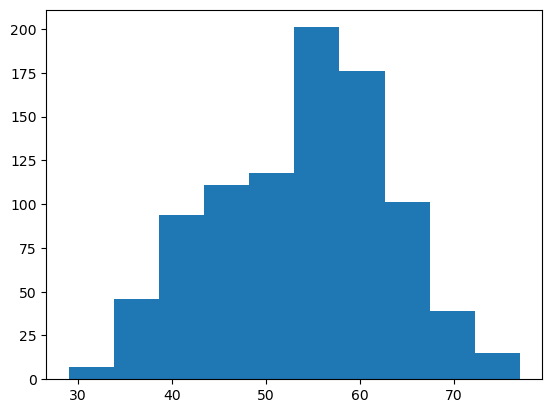

In [537]:
plt.hist(df['age'])
plt.show

In [538]:
df['age'].skew()

-0.13679653817221868

In [539]:
# Here data is preety much normally distributed

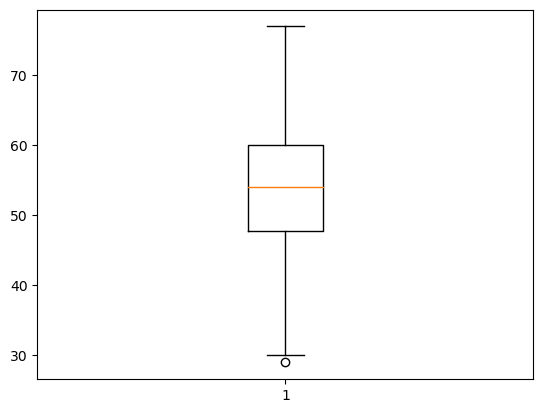

In [540]:
box1 = plt.boxplot(df['age'])
plt.show()

In [541]:
[item.get_ydata() for item in box1['fliers']]

[array([29], dtype=int64)]

In [542]:
df[df['age'] == 29]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
134,29,Male,atypical angina,130,204,False,lv hypertrophy,202,False,0.0,upsloping,normal,0


In [543]:
# Here age 29 is outlier while majority of age varies between 45 to 65

In [544]:
# Since it has only one outlier we will remove it

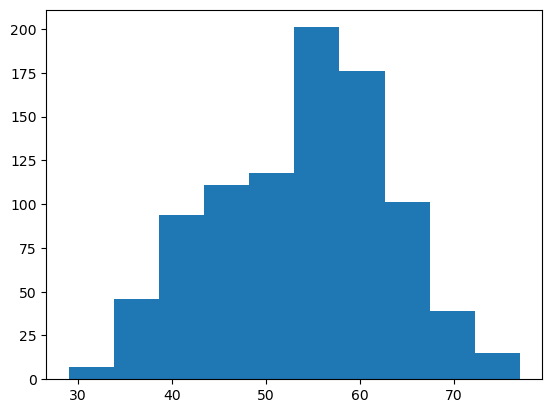

-0.13679653817221868

In [545]:
plt.hist(df['age'])
plt.show()

df['age'].skew()

In [546]:
df.drop(134, inplace=True)

In [547]:
# For trestbps column

C:\Users\Sunny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


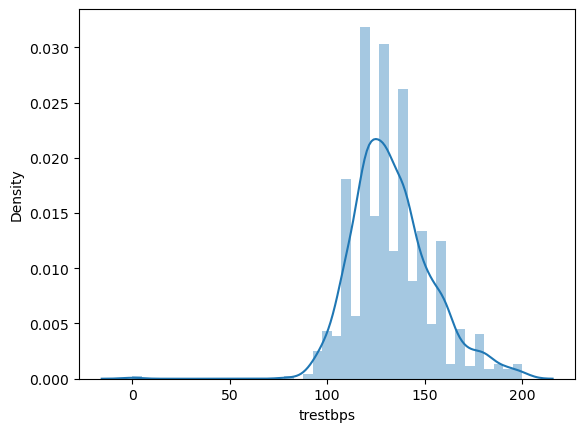

In [548]:
sns.distplot(df['trestbps'])
plt.show()

In [549]:
df['trestbps'].skew()

0.3529205038993966

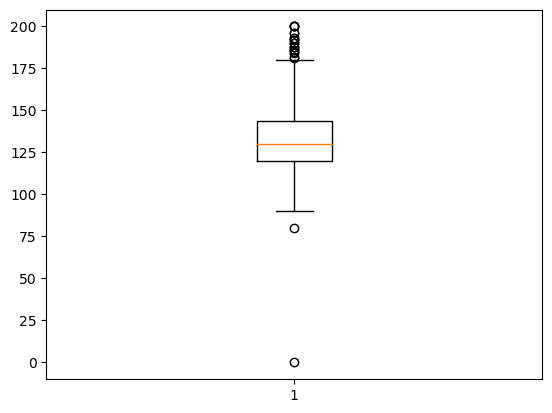

In [550]:
box2 = plt.boxplot(df['trestbps'])
plt.show()

In [551]:
[item.get_ydata() for item in box2['fliers']]

[array([ 80,   0, 190, 181, 188, 193, 196, 192, 185, 200, 184, 192, 186,
        200, 200, 200, 188, 182, 196, 193, 186, 190], dtype=int64)]

# Since it has more outliers we will use whinsorize for that

In [552]:
from scipy.stats.mstats import winsorize

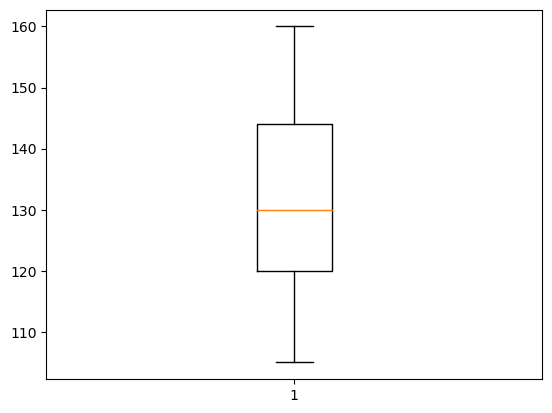

In [553]:
WinsorizedArray = winsorize(df['trestbps'],(0.05,0.1))
  
plt.boxplot(WinsorizedArray)
plt.show()

In [554]:
type(WinsorizedArray)

numpy.ma.core.MaskedArray

In [555]:
df['trestbps'] = WinsorizedArray

In [556]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,160,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,160,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


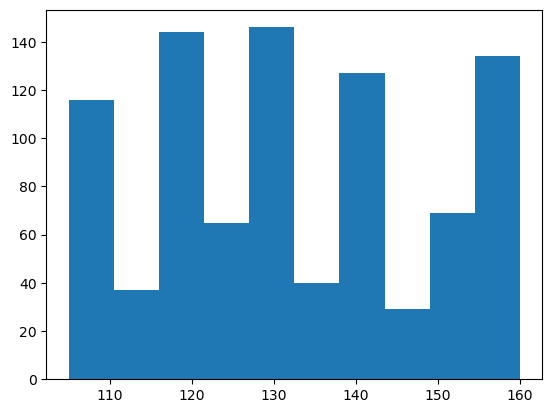

0.2018906299470651

In [557]:
plt.hist(df['trestbps'])
plt.show()

df['trestbps'].skew()

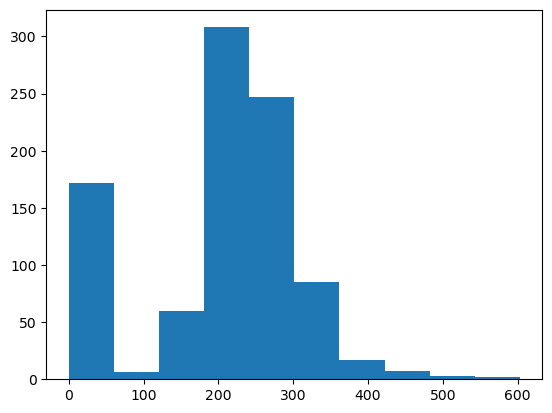

In [558]:
plt.hist(df['chol'])
plt.show()

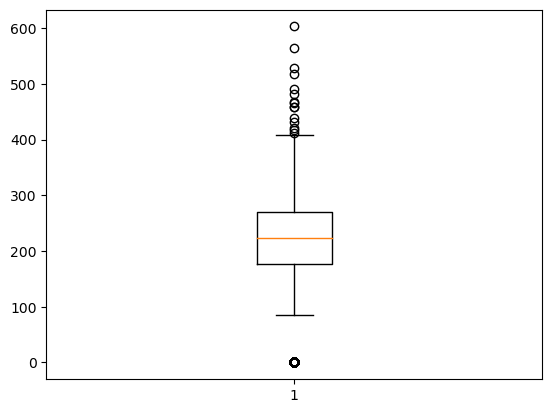

In [559]:
box3 = plt.boxplot(df['chol'])
plt.show()

In [560]:
[item.get_ydata() for item in box3['fliers']]

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 417, 439, 564, 458, 481, 459

In [561]:
# Since too many zero's are there we will replace it will mean values

In [562]:
# for that we will calculate mean for non-zero rows

In [563]:
mean_value = df.loc[df['chol'] != 0, 'chol'].mean()

In [564]:
df['chol'] = df['chol'].replace(0, mean_value)

In [565]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233.000000,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203.000000,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192.000000,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186.000000,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201.000000,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,248.631293,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,160,170.000000,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,160,248.631293,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208.000000,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


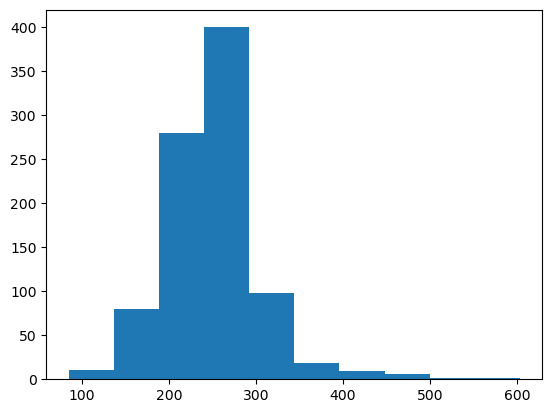

In [566]:
plt.hist(df['chol'])
plt.show()

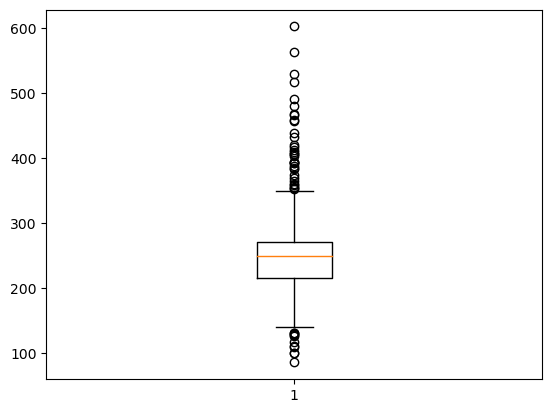

In [567]:
box3 = plt.boxplot(df['chol'])
plt.show()

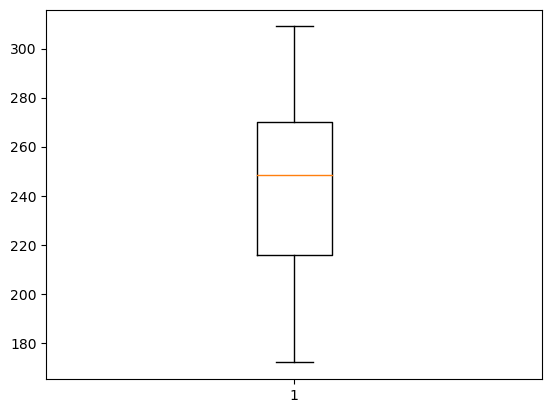

In [568]:
WinsorizedArray = winsorize(df['chol'],(0.05,0.1))
  
plt.boxplot(WinsorizedArray)
plt.show()

In [569]:
df['chol'] = WinsorizedArray

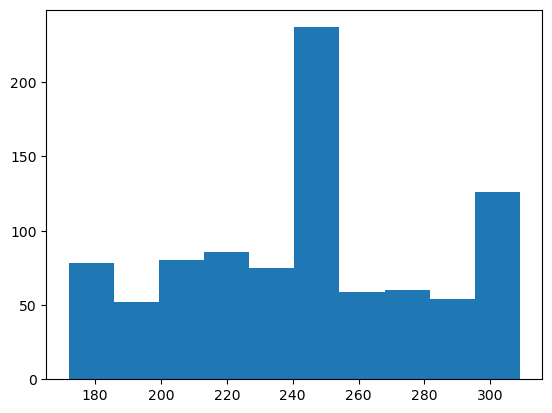

-0.023595619456631144

In [570]:
plt.hist(df['chol'])
plt.show()

df['chol'].skew()

In [571]:
df['oldpeak'].isnull().sum()

62

Here we remove the 62 null values for that we will replace that with mean value

In [572]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [573]:
df['oldpeak']

0      2.300000
1      0.000000
2      0.400000
3      0.000000
4      1.500000
         ...   
903    1.500000
904    3.000000
905    2.500000
906    0.892308
907    0.892308
Name: oldpeak, Length: 907, dtype: float64

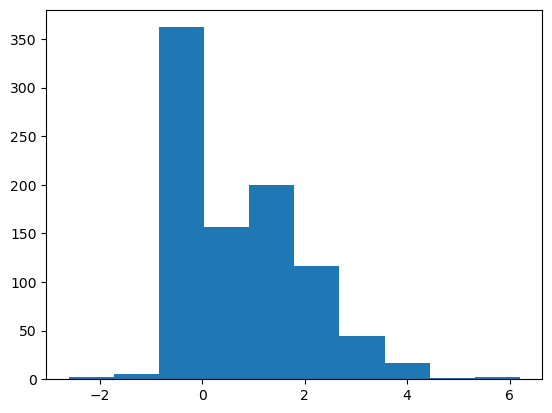

In [574]:
plt.hist(df['oldpeak'])
plt.show()

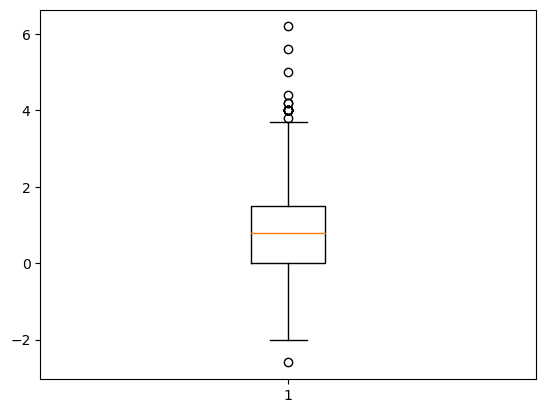

In [575]:
box5 = plt.boxplot(df['oldpeak'])
plt.show()

In [576]:
[item.get_ydata() for item in box5['fliers']]

[array([-2.6,  4.2,  4. ,  5. ,  4. ,  4. ,  6.2,  5.6,  4. ,  4.2,  4. ,
         4.4,  4. ,  3.8,  4. ,  4. ])]

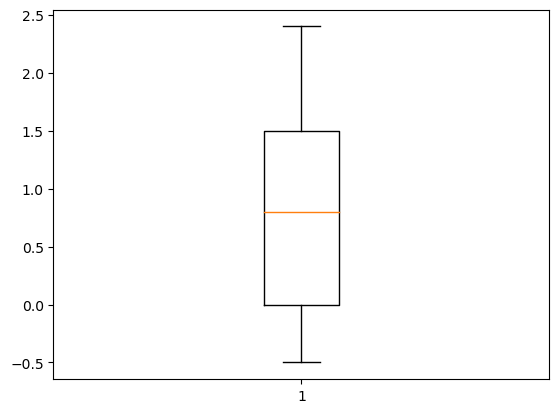

In [577]:
WinsorizedArray = winsorize(df['oldpeak'],(0.01,0.1))
  
plt.boxplot(WinsorizedArray)
plt.show()

In [578]:
df['oldpeak'] = WinsorizedArray

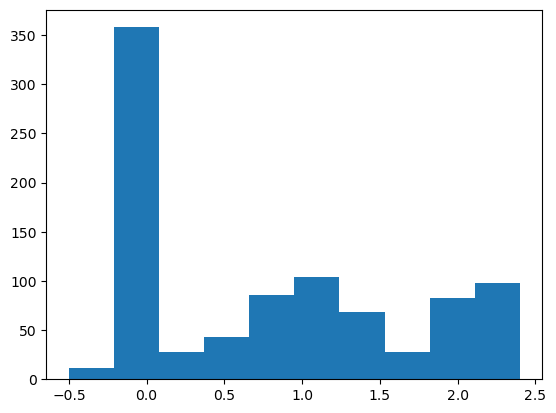

0.512739193763429

In [579]:
plt.hist((df['oldpeak']))
plt.show()

(df['oldpeak']).skew()

# Data Pre processing

#### Doing one hot encoding on categorical columns

In [580]:
# For exang column

In [581]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [582]:
boolean_mapping = {'TRUE': True, 'FALSE': False}

In [583]:
df['exang'] = df['exang'].map(boolean_mapping)

In [584]:
df['exang'] = df['exang'].astype(bool)

In [585]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233.000000,True,lv hypertrophy,150,True,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203.000000,False,normal,132,True,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192.000000,False,normal,148,True,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186.000000,False,lv hypertrophy,190,True,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201.000000,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,248.631293,False,normal,120,True,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,160,172.000000,False,st-t abnormality,120,True,2.400000,flat,reversable defect,4
905,56,Male,non-anginal,160,248.631293,False,lv hypertrophy,123,True,2.400000,downsloping,normal,4
906,56,Male,non-anginal,144,208.000000,True,st-t abnormality,105,True,0.892308,downsloping,fixed defect,4


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    float64
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    bool   
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 86.8+ KB


In [587]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['sex', 'cp', 'restecg', 'slope', 'thal']

In [588]:
encoded_df = pd.get_dummies(df, columns=object_columns)

In [589]:
encoded_df

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233.000000,True,150,True,2.300000,0,0,1,...,1,1,0,0,1,0,0,1,0,0
1,41,135,203.000000,False,132,True,0.000000,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,57,140,192.000000,False,148,True,0.400000,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,52,118,186.000000,False,190,True,0.000000,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,57,110,201.000000,False,126,True,1.500000,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,248.631293,False,120,True,1.500000,4,0,1,...,0,0,1,0,0,0,1,0,0,1
904,62,160,172.000000,False,120,True,2.400000,4,0,1,...,0,0,0,1,0,1,0,0,0,1
905,56,160,248.631293,False,123,True,2.400000,4,0,1,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208.000000,True,105,True,0.892308,4,0,1,...,0,0,0,1,1,0,0,1,0,0


# Spliting the data for training and testing

In [600]:
X = encoded_df.drop('num', axis=1) #Since number is target

In [601]:
y = encoded_df['num']

In [602]:
from sklearn.model_selection import train_test_split

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Decision Tree model

In [604]:
from sklearn.tree import DecisionTreeClassifier

In [605]:
model = DecisionTreeClassifier()

# Fitting the model

In [606]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [607]:
y_pred  = model.predict(X_test)

In [608]:
from sklearn.metrics import classification_report

In [609]:
report = classification_report(y_test, y_pred)

In [610]:
print(report)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.31      0.36      0.34        47
           2       0.13      0.10      0.11        20
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         9

    accuracy                           0.48       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.47      0.48      0.47       182



# Plotting Tree

In [611]:
from sklearn import tree

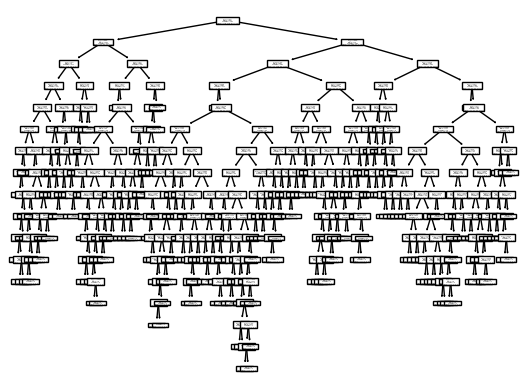

In [613]:
tree.plot_tree(model)
plt.show()

# HyperParameter Tuning

#### selecting max_depth, min_sample_split and criterion

In [686]:
model1 = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=60, max_features=12)

In [687]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=12,
                       min_samples_split=60)

In [688]:
y_pred1  = model1.predict(X_test)

In [689]:
report1 = classification_report(y_test, y_pred1)

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [690]:
print(report1)

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        89
           1       0.42      0.60      0.50        47
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         9

    accuracy                           0.57       182
   macro avg       0.22      0.29      0.25       182
weighted avg       0.44      0.57      0.50       182



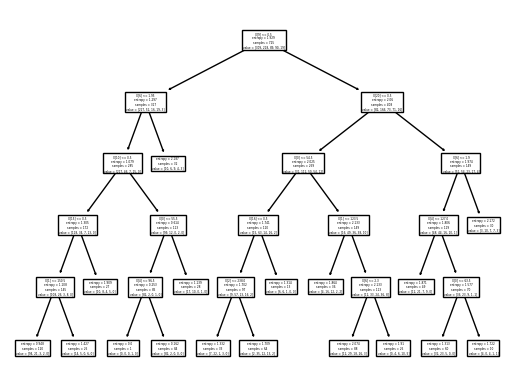

In [691]:
tree.plot_tree(model1)
plt.show()